In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

In [4]:
img.shape

(873, 1164, 3)

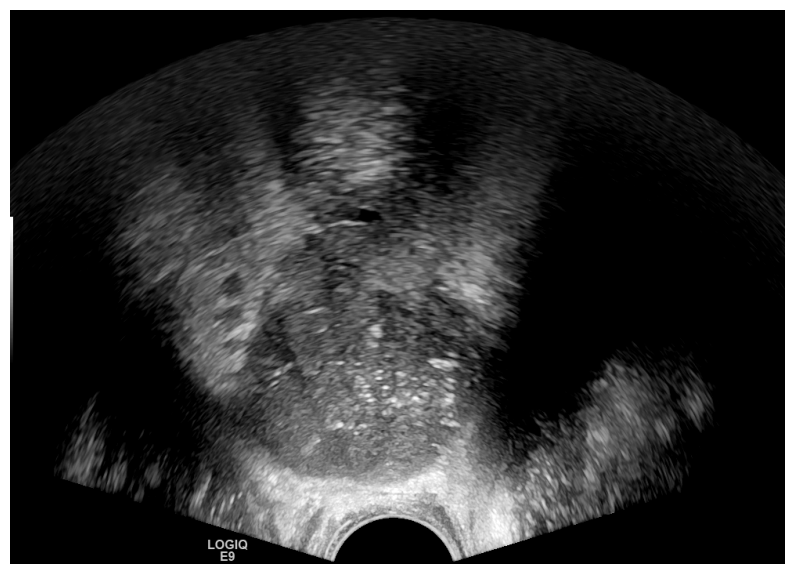

In [2]:
img = cv.imread('data\\sech_2\\2024.04.05\\Image30.jpg')
img_crop = img[100:808, 40:1030]
plt.figure(figsize=(10, 10))
plt.imshow(img_crop)
plt.axis('off')
plt.show()

In [7]:
img_crop.shape

(708, 990, 3)

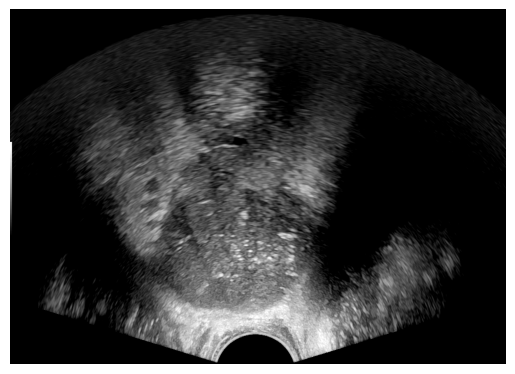

In [3]:
color = (0, 0, 0)  
thickness = -1  
cv.rectangle(img_crop, (0, 675), (305, 708), color, thickness)
plt.imshow(img_crop)
plt.axis('off')
plt.show()

# SAM

In [4]:
# image_path = "Image53.jpg"  
sam_checkpoint = "sam_vit_b_01ec64.pth"  # sam_vit_b_01ec64.pth  /////   sam_vit_h_4b8939.pth
model_type = "vit_b"  #  vit_h ///// vit_b

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)

sam.to("cuda")  


mask_generator = SamAutomaticMaskGenerator(sam)

# image = cv2.imread(image_path)
image = img_crop
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Конвертируем BGR в RGB для SAM

masks = mask_generator.generate(image)

def overlay_masks(image, masks):
    overlay = image.copy()
    for mask in masks:
        color = np.random.randint(0, 255, size=3, dtype=np.uint8)
        overlay[mask['segmentation']] = overlay[mask['segmentation']] * 0.5 + color * 0.5
    return overlay

segmented_image = overlay_masks(image, masks)
plt.figure(figsize=(10, 10))
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.l

OutOfMemoryError: CUDA out of memory. Tried to allocate 768.00 MiB. GPU 0 has a total capacity of 3.00 GiB of which 399.45 MiB is free. Of the allocated memory 1.95 GiB is allocated by PyTorch, and 86.14 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [6]:
import torch
print(torch.cuda.is_available())
print(torch.version.cuda)

True
11.8


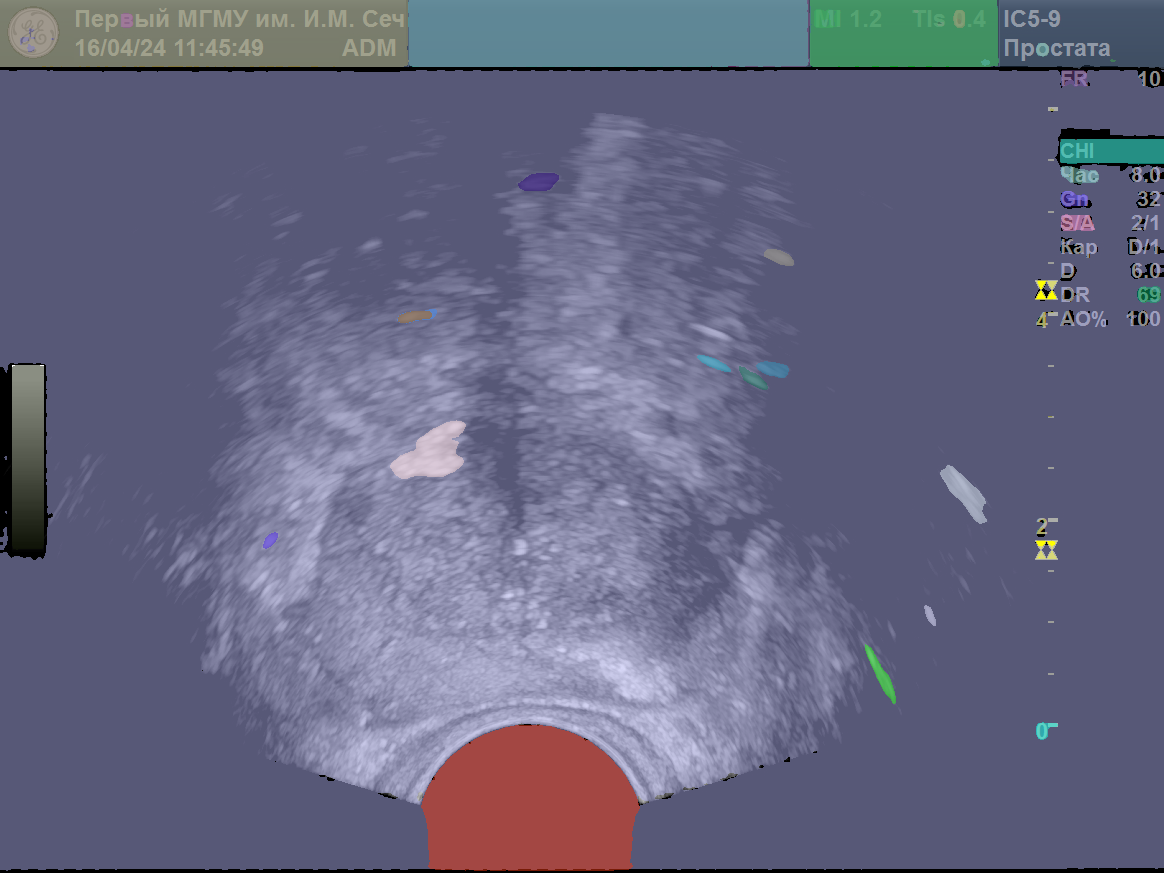

In [14]:
masks = mask_generator.generate(img)

def overlay_masks(image, masks):
    overlay = image.copy()
    for mask in masks:
        color = np.random.randint(0, 255, size=3, dtype=np.uint8)
        overlay[mask['segmentation']] = overlay[mask['segmentation']] * 0.5 + color * 0.5
    return overlay

segmented_image = overlay_masks(img, masks)
cv2_imshow(segmented_image)